In [1]:
import numpy as np #Numpy para manipulações algébricas
import matplotlib.pyplot as plt #matplotlib para plotar gráficos
import pandas as pd #pandas para manipulação de dados
import seaborn as sns #seaborn visualização estatística
import matplotlib.ticker as ticker
from datetime import date
from itertools import *
import matplotlib.dates as mdates
import numpy as np
import time

In [2]:
# Configurações de plotagem
plt.rcParams.update({
    'font.size': 14,
    
    'xtick.color': 'black', #color: 'white' porque a tela é preta
    'ytick.color': 'black',
    'axes.labelcolor': 'black',
    'axes.titlecolor': 'black',
    'axes.titlesize': 20,
    'figure.figsize': (25,10)
})

# Configurando para warnings do pandas não aparecerem
pd.options.mode.chained_assignment = None

# Ignorando Future Warnings
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

In [3]:
import matplotlib.pyplot as plt
from matplotlib.transforms import offset_copy
import os
from matplotlib import font_manager as fm, rcParams
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

In [4]:
pd.options.mode.chained_assignment = None  # default='warn'

In [6]:
data = pd.read_csv("Vale5.csv")
data.drop(['Unnamed: 0'], axis =1, inplace=True)

In [7]:
data

,Identificação do veículo,Número do eixo do veículo,Lateral do veículo,Espessura do friso (mm),Altura do friso (mm),Espessura da banda de rodagem (mm),Cava na roda do trilho (mm),Dia do trem,Intervalo de Dias,Classe Espessura do friso,Classe Altura do friso,Classe Espessura da banda de rodagem,Classe Cava na roda do trilho
0,GDE 212465,4,L,32.3,29.1,73.8,0.3,2021-01-01,0,1.0,3.0,1.0,1.0
1,GDE 207312,1,R,31.0,28.6,66.2,0.8,2021-01-02,0,2.0,2.0,2.0,2.0
2,GDE 213384,1,L,25.1,28.4,36.8,0.3,2021-01-02,0,4.0,2.0,5.0,1.0
3,GDE 207312,1,L,30.0,29.6,65.8,0.8,2021-01-02,0,2.0,3.0,2.0,2.0
4,GDE 207312,2,L,28.8,28.9,69.8,0.0,2021-01-02,0,3.0,2.0,2.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4534971,GDE 204539,3,R,30.5,28.9,41.6,0.2,2021-08-31,242,2.0,2.0,5.0,0.0
4534972,GDE 204539,3,L,29.9,28.8,41.7,0.0,2021-08-31,242,2.0,2.0,5.0,0.0
4534973,GDE 204539,4,R,24.9,28.7,42.4,0.1,2021-08-31,242,4.0,2.0,4.0,1.0
4534974,GDE 206472,3,L,25.1,29.1,51.8,0.5,2021-08-31,242,4.0,2.0,3.0,1.0


In [87]:
data['Dia do trem'] = pd.to_datetime(data['Dia do trem'], format='%Y/%m/%d')

In [88]:
df = data.groupby(['Classe Espessura do friso', 'Lateral do veículo','Número do eixo do veículo']).get_group((1,'R',1))

In [99]:
df = df.resample('D', on = 'Dia do trem').mean()

In [121]:
df

,Número do eixo do veículo,Espessura do friso (mm),Altura do friso (mm),Espessura da banda de rodagem (mm),Cava na roda do trilho (mm),Intervalo de Dias,Classe Espessura do friso,Classe Altura do friso,Classe Espessura da banda de rodagem,Classe Cava na roda do trilho
Dia do trem,,,,,,,,,,
2021-01-01,1.0,32.409483,29.837069,71.718966,0.565517,0.000000,1.0,3.094828,1.215517,1.525862
2021-01-02,1.0,32.419008,29.773554,71.977686,0.476860,0.000000,1.0,2.975207,1.123967,1.297521
2021-01-03,1.0,32.418881,29.939860,72.451748,0.595804,0.923077,1.0,3.139860,1.125874,1.510490
2021-01-04,1.0,32.474074,29.857407,72.094444,0.615741,1.583333,1.0,3.064815,1.129630,1.537037
2021-01-05,1.0,32.496296,29.898148,72.405556,0.529630,2.185185,1.0,3.037037,1.101852,1.305556
...,...,...,...,...,...,...,...,...,...,...
2021-08-27,1.0,29.065385,29.253846,62.585256,0.391667,230.108974,1.0,3.102564,1.115385,1.467949
2021-08-28,1.0,28.685629,29.170060,60.182635,0.397605,231.143713,1.0,3.011976,1.167665,1.401198
2021-08-29,1.0,28.386232,28.974638,59.209420,0.365942,232.579710,1.0,3.036232,1.144928,1.362319


In [103]:
d1 = pd.DataFrame(df['Espessura do friso (mm)'])
d1

,Espessura do friso (mm)
Dia do trem,
2021-01-01,32.409483
2021-01-02,32.419008
2021-01-03,32.418881
2021-01-04,32.474074
2021-01-05,32.496296
...,...
2021-08-27,29.065385
2021-08-28,28.685629
2021-08-29,28.386232


In [117]:
d1['MM21'] = d1['Espessura do friso (mm)'].rolling(21).mean()
d1

,Espessura do friso (mm),MM21,MME9
Dia do trem,,,
2021-01-01,32.409483,NaN,NaN
2021-01-02,32.419008,NaN,NaN
2021-01-03,32.418881,NaN,NaN
2021-01-04,32.474074,NaN,NaN
2021-01-05,32.496296,NaN,NaN
...,...,...,...
2021-08-27,29.065385,29.049810,29.040118
2021-08-28,28.685629,29.018058,29.007892
2021-08-29,28.386232,28.976703,28.951377


In [119]:
d1["MME9"] = d1['Espessura do friso (mm)'].ewm(span=9, min_periods=9).mean()
d1

,Espessura do friso (mm),MM21,MME9
Dia do trem,,,
2021-01-01,32.409483,NaN,NaN
2021-01-02,32.419008,NaN,NaN
2021-01-03,32.418881,NaN,NaN
2021-01-04,32.474074,NaN,NaN
2021-01-05,32.496296,NaN,NaN
...,...,...,...
2021-08-27,29.065385,29.049810,28.923836
2021-08-28,28.685629,29.018058,28.876194
2021-08-29,28.386232,28.976703,28.778202


<ipython-input-120-98e4a6844653>:3: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.plot(d1["MM21"], color="green", lineWidth=3)
<ipython-input-120-98e4a6844653>:4: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.plot(d1["MME9"], color="magenta", lineWidth=3)


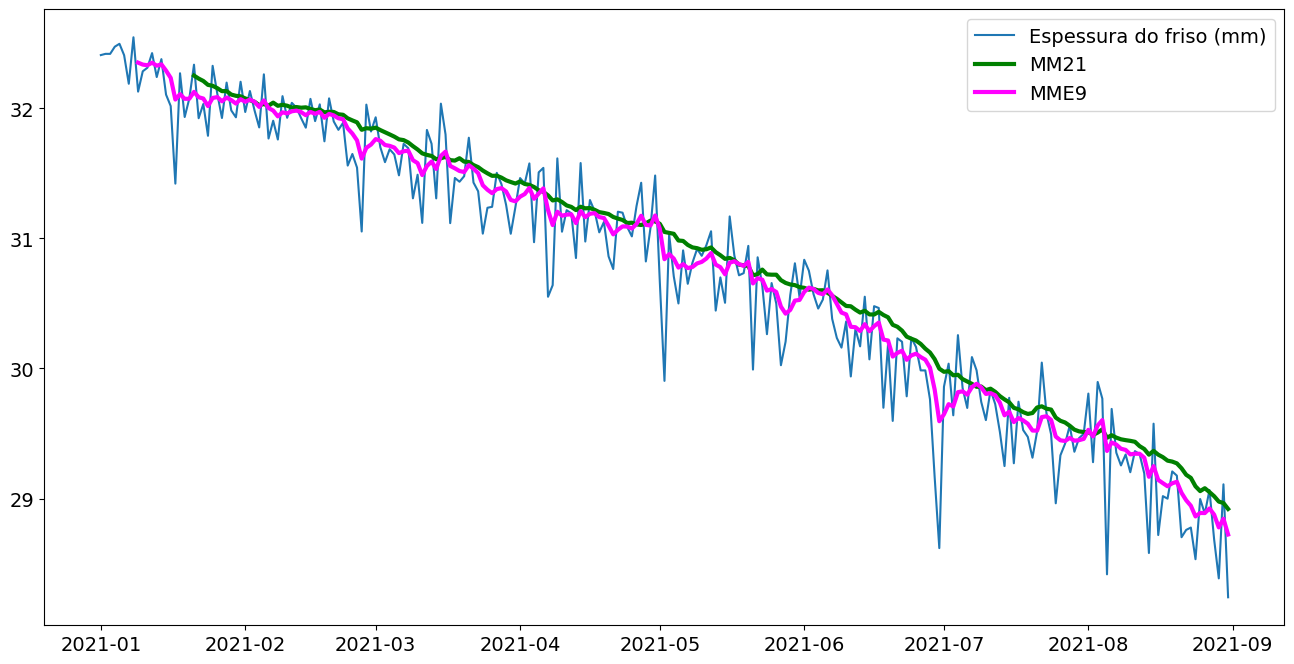

In [120]:
plt.figure(figsize=(16,8))
plt.plot(d1['Espessura do friso (mm)'])
plt.plot(d1["MM21"], color="green", lineWidth=3)
plt.plot(d1["MME9"], color="magenta", lineWidth=3)
plt.legend(d1)
plt.show()

In [147]:
data

,Identificação do veículo,Número do eixo do veículo,Lateral do veículo,Espessura do friso (mm),Altura do friso (mm),Espessura da banda de rodagem (mm),Cava na roda do trilho (mm),Dia do trem,Intervalo de Dias,Classe Espessura do friso,Classe Altura do friso,Classe Espessura da banda de rodagem,Classe Cava na roda do trilho
0,GDE 212465,4,L,32.3,29.1,73.8,0.3,2021-01-01,0,1.0,3.0,1.0,1.0
1,GDE 207312,1,R,31.0,28.6,66.2,0.8,2021-01-02,0,2.0,2.0,2.0,2.0
2,GDE 213384,1,L,25.1,28.4,36.8,0.3,2021-01-02,0,4.0,2.0,5.0,1.0
3,GDE 207312,1,L,30.0,29.6,65.8,0.8,2021-01-02,0,2.0,3.0,2.0,2.0
4,GDE 207312,2,L,28.8,28.9,69.8,0.0,2021-01-02,0,3.0,2.0,2.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4534971,GDE 204539,3,R,30.5,28.9,41.6,0.2,2021-08-31,242,2.0,2.0,5.0,0.0
4534972,GDE 204539,3,L,29.9,28.8,41.7,0.0,2021-08-31,242,2.0,2.0,5.0,0.0
4534973,GDE 204539,4,R,24.9,28.7,42.4,0.1,2021-08-31,242,4.0,2.0,4.0,1.0
4534974,GDE 206472,3,L,25.1,29.1,51.8,0.5,2021-08-31,242,4.0,2.0,3.0,1.0


In [166]:
df = data.groupby(['Classe Espessura do friso','Lateral do veículo','Número do eixo do veículo']).get_group((1,'R',1)
bounds = df.groupby(['Intervalo de Dias'])['Espessura do friso (mm)'].quantile((0.05,0.95,0.5)).unstack()
media = df.groupby(['Intervalo de Dias'])['Espessura do friso (mm)'].mean()

SyntaxError: invalid syntax (<ipython-input-166-c21b99e493e3>, line 2)

In [172]:
bounds = df.groupby(['Intervalo de Dias'])['Espessura do friso (mm)'].quantile((0.05,0.95,0.5)).unstack()


In [173]:
bounds

,0.05,0.95,0.50
Intervalo de Dias,,,
0,23.6,31.700,26.9
1,23.5,31.500,26.7
2,23.7,31.800,27.0
3,23.6,31.700,26.9
4,23.6,31.800,27.0
...,...,...,...
238,23.1,30.000,26.0
239,22.9,30.100,25.9
240,22.9,30.000,25.9


In [188]:
def plotclasse(data, variavel, classe,i):
    palette = sns.color_palette("tab10")
    lado = ['R','L']
    eixo = [1,2,3,4]
    
    group_classe = [classe, 'Lateral do veículo','Número do eixo do veículo']
    maximo = []
    minimo = []

    for p,q in zip(range(8),product(lado,eixo)):  # column index      
        fig, g = plt.subplots(figsize=(15, 10))
        handles, labels = g.get_legend_handles_labels()
        
        #for i in range(1,5):  
        
        titulo = ['Roda lateral {} eixo {} classe {}'.format(col,row,i) for col,row in product(lado,eixo)]
        
        try:
                df = data.groupby(group_classe).get_group((i,q[0],q[1]))
                bounds = df.groupby('Intervalo de Dias')[variavel].quantile((0.05,0.95,0.5)).unstack()
                media = df.groupby('Intervalo de Dias')[variavel].mean()
                maximo.append(bounds.max().max())
                minimo.append(bounds.min().min())
                
                d1 = df.resample('D', on = 'Dia do trem').mean()
                d2 = pd.DataFrame(d1[variavel])
                d2["MME21"] = d2[variavel].ewm(span=21, min_periods=21).mean()
                
                g.scatter(x= df['Dia do trem'],y = df[variavel], color = 'white', alpha = 0.5, 
                          s = 100, label = 'Dados',edgecolors = palette[7])
                g.plot(d2.index, bounds.iloc[:,2], color = palette[1], lw = 3.0, label = 'Mediana')#, label = 'Classe %s' % i)
                g.plot(d2.index, media, color = palette[0], lw = 3.0, label = 'Média')#, label = 'Classe %s' % i)
                g.plot(d2.index, bounds.iloc[:,0], color = palette[2], lw = 3.0, label = 'Percentil 5%')
                g.plot(d2.index, bounds.iloc[:,1], color = palette[3], lw = 3.0, label = 'Percentil 95%')
                
                g.plot(d2["MME21"], color="magenta", lw=3,label = 'MME21')
                
                #g.fill_between(x = bounds.index,y1 = bounds.iloc[:,0],y2 = bounds.iloc[:,1],alpha=0.1,
                #          color = palette[i])
                #handles.append(mpatches.Patch(color= palette[i],label = 'Classe %s' % i)) #legenda da classe
        except KeyError:
                pass
            
        #lines = [Line2D([], [], color= 'black', label = 'Mediana',lw = 2.0),
         #        Line2D([], [], color= 'black', ls= (0, (5, 1)), label = 'Média',lw = 2.0),
          #       Line2D([], [], color= 'black', ls= (0, (3, 1, 1, 1, 1, 1)), label = 'Percentil 5%',lw = 2.0),
           #      Line2D([], [], color= 'black', ls= (0, (3, 1, 1, 1)), label = 'Percentil 95%',lw = 2.0)]

        #handles.extend(lines)
        
        g.set_title(titulo[p],fontsize = 20, pad = 20) #g.annotate(titulo[p], (0.5, 1), xytext=(0, 10), xycoords='axes fraction', textcoords='offset points', size='large', ha='center', va='baseline')
        
        #g.set_xlim(0, data['Intervalo de Dias'].max())
        g.set_xlabel(xlabel='Tempo (Dia)', fontsize=18)
       
        #g.set_ylim(min(minimo), max(maximo))
        #g.set_ylim(min(data[variavel]), max(data[variavel]))
        #g.set_ylim(data.loc[data[classe] == i][variavel].min(), data.loc[data[classe] == i][variavel].max())
        g.set_ylabel(ylabel= variavel, fontsize=18)
        
        #g.legend(handles=handles, bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0., fontsize=18, frameon=False)
        g.legend(bbox_to_anchor=(0.5, -0.1), loc='upper center',
                 ncol=5, borderaxespad=0., fontsize=18,fancybox=True,shadow=True)
        
        plt.tight_layout()
        #plt.show()
        plt.savefig("teste _{}_{}.pdf".format(variavel,titulo[p]), bbox_inches='tight')

In [189]:
columns2 = ['Classe Espessura do friso']#,'Classe Cava na roda do trilho', 'Classe Altura do friso','Classe Espessura da banda de rodagem']
columns1 = ['Espessura do friso (mm)']#,'Cava na roda do trilho (mm)','Altura do friso (mm)','Espessura da banda de rodagem (mm)']
i = 1
for v,c in zip(columns1,columns2):
    plotclasse(data, v, c, i)

<ipython-input-188-7993c8d7775d>:11: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, g = plt.subplots(figsize=(15, 10))
